Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

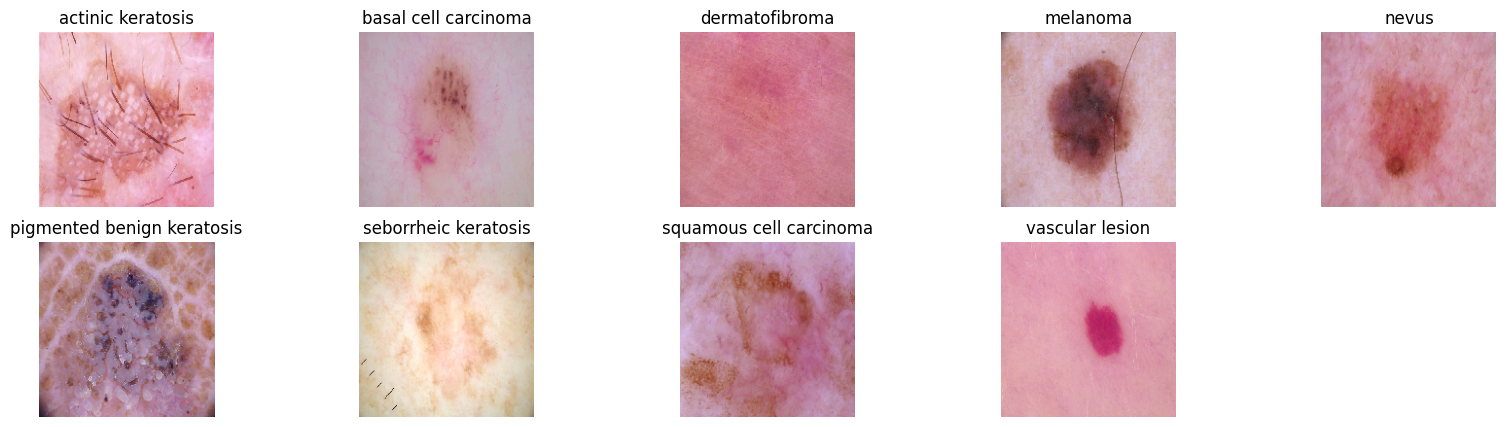

In [11]:
plt.figure(figsize=(20, 5))

# iterate over each class and display one image
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_train, class_name)
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Get the first image in each class
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

    plt.subplot(2, 5, i + 1)  # Adjust the subplot layout based on the number of classes
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1 - Only Convolutional Layers, No Dropuouts or Normalization

### Model Design, Compile & Summary

In [11]:
### Your code goes here
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

### Model Training

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 957s 1s/step - loss: 1.8926 - accuracy: 0.2993 - val_loss: 1.4441 - val_accuracy: 0.4410
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 1.4351 - accuracy: 0.4522 - val_loss: 1.3174 - val_accuracy: 0.4952
Epoch 3/20
169/169 [==============================] - 7s 40ms/step - loss: 1.1830 - accuracy: 0.5631 - val_loss: 1.0731 - val_accuracy: 0.6214
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 0.9608 - accuracy: 0.6445 - val_loss: 0.9709 - val_accuracy: 0.6496
Epoch 5/20
169/169 [==============================] - 7s 40ms/step - loss: 0.7714 - accuracy: 0.7211 - val_loss: 0.8140 - val_accuracy: 0.7112
Epoch 6/20
169/169 [==============================] - 7s 40ms/step - loss: 0.6277 - accuracy: 0.7754 - val_loss: 0.7932 - val_accuracy: 0.7298
Epoch 7/20
169/169 [==============================] - 7s 40ms/step - loss: 0.4612 - accuracy: 0.8338 - val_loss: 0.7154 - val_accuracy: 0.7751

### Visualizing training results

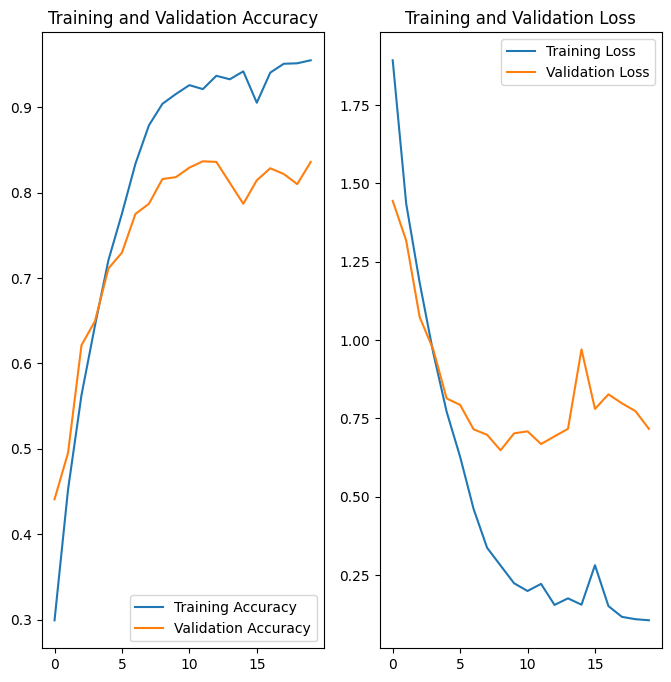

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:
1. Training Accuracy: is High
2. Validation Accuracy: is low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

# Augmenting Training Dataset

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmented_train_ds = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

## Model 2 - With Augmentation

### Model Design, Compile & Summary

In [18]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

### Model Training

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 10s 46ms/step - loss: 2.0547 - accuracy: 0.2498 - val_loss: 1.5806 - val_accuracy: 0.3601
Epoch 2/20
169/169 [==============================] - 7s 44ms/step - loss: 1.5808 - accuracy: 0.3963 - val_loss: 1.4567 - val_accuracy: 0.4254
Epoch 3/20
169/169 [==============================] - 7s 43ms/step - loss: 1.4431 - accuracy: 0.4418 - val_loss: 1.3496 - val_accuracy: 0.4499
Epoch 4/20
169/169 [==============================] - 7s 44ms/step - loss: 1.3779 - accuracy: 0.4666 - val_loss: 1.5964 - val_accuracy: 0.4217
Epoch 5/20
169/169 [==============================] - 7s 44ms/step - loss: 1.3339 - accuracy: 0.4787 - val_loss: 1.3516 - val_accuracy: 0.4915
Epoch 6/20
169/169 [==============================] - 7s 43ms/step - loss: 1.2757 - accuracy: 0.5126 - val_loss: 1.3035 - val_accuracy: 0.4870
Epoch 7/20
169/169 [==============================] - 7s 43ms/step - loss: 1.2265 - accuracy: 0.5221 - val_loss: 1.3076 - val_accuracy: 0.489

### Visualizing training results

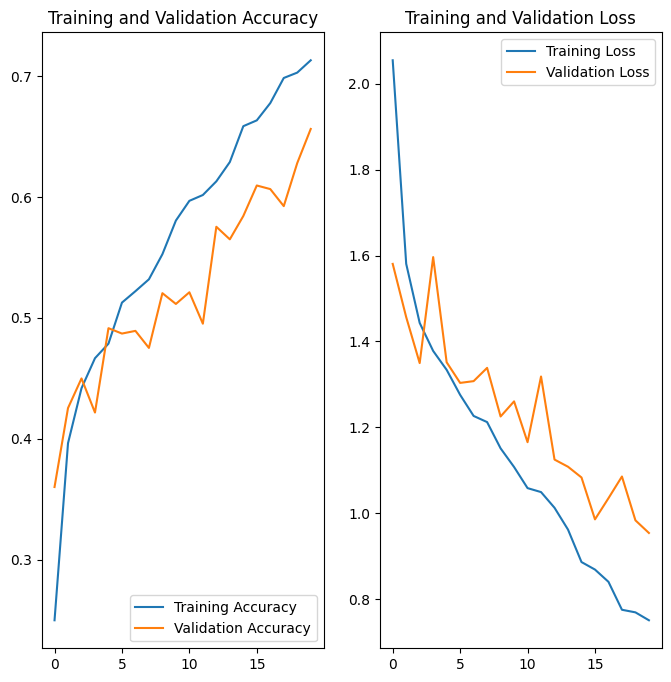

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:
> aaa
> bbb


## Model 3 - With Augmentation & Dropout

### Model Design, Compile & Summary

In [23]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

### Model Training

In [25]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 14s 64ms/step - loss: 1.8214 - accuracy: 0.3186 - val_loss: 1.4808 - val_accuracy: 0.4313
Epoch 2/20
169/169 [==============================] - 11s 62ms/step - loss: 1.5107 - accuracy: 0.4190 - val_loss: 1.3266 - val_accuracy: 0.4736
Epoch 3/20
169/169 [==============================] - 11s 63ms/step - loss: 1.4416 - accuracy: 0.4494 - val_loss: 1.3564 - val_accuracy: 0.4506
Epoch 4/20
169/169 [==============================] - 10s 61ms/step - loss: 1.3744 - accuracy: 0.4651 - val_loss: 1.2847 - val_accuracy: 0.4974
Epoch 5/20
169/169 [==============================] - 10s 61ms/step - loss: 1.2816 - accuracy: 0.5119 - val_loss: 1.2434 - val_accuracy: 0.5308
Epoch 6/20
169/169 [==============================] - 10s 61ms/step - loss: 1.2461 - accuracy: 0.5317 - val_loss: 1.4333 - val_accuracy: 0.4714
Epoch 7/20
169/169 [==============================] - 10s 61ms/step - loss: 1.2065 - accuracy: 0.5393 - val_loss: 1.2767 - val_accuracy:

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 4 - With Augmentation & Additional Dropout

In [26]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                      

### Model Training

In [27]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 13s 66ms/step - loss: 2.4143 - accuracy: 0.1601 - val_loss: 2.1322 - val_accuracy: 0.1923
Epoch 2/20
169/169 [==============================] - 11s 66ms/step - loss: 1.9086 - accuracy: 0.2704 - val_loss: 1.7286 - val_accuracy: 0.3675
Epoch 3/20
169/169 [==============================] - 11s 65ms/step - loss: 1.5816 - accuracy: 0.3897 - val_loss: 1.5327 - val_accuracy: 0.4276
Epoch 4/20
169/169 [==============================] - 11s 65ms/step - loss: 1.5186 - accuracy: 0.4134 - val_loss: 1.5252 - val_accuracy: 0.4098
Epoch 5/20
169/169 [==============================] - 11s 66ms/step - loss: 1.4591 - accuracy: 0.4395 - val_loss: 1.4492 - val_accuracy: 0.4358
Epoch 6/20
169/169 [==============================] - 11s 66ms/step - loss: 1.3994 - accuracy: 0.4657 - val_loss: 1.4575 - val_accuracy: 0.4380
Epoch 7/20
169/169 [==============================] - 11s 64ms/step - loss: 1.3708 - accuracy: 0.4701 - val_loss: 1.3852 - val_accuracy:

### Visualizing training results

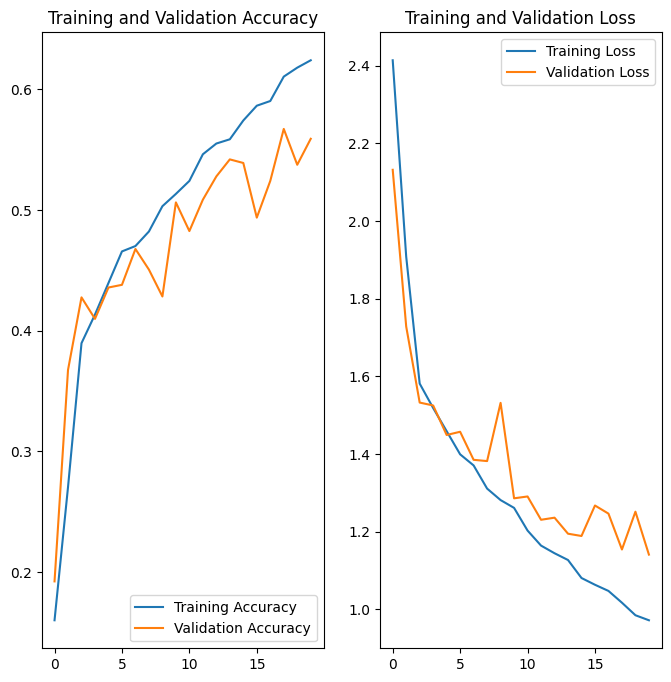

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:

## Model 5 - With Augmentation + Dropouts + Batch Normilzation

### Model Design, Compile & Summary

In [29]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 89, 89, 32)        128       
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 89, 89, 32)       

### Model Training

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 15s 72ms/step - loss: 10.0586 - accuracy: 0.2949 - val_loss: 7.2981 - val_accuracy: 0.0846
Epoch 2/20
169/169 [==============================] - 12s 71ms/step - loss: 3.5359 - accuracy: 0.3698 - val_loss: 5.2329 - val_accuracy: 0.1143
Epoch 3/20
169/169 [==============================] - 12s 71ms/step - loss: 1.8606 - accuracy: 0.4529 - val_loss: 2.2647 - val_accuracy: 0.2420
Epoch 4/20
169/169 [==============================] - 12s 70ms/step - loss: 1.5883 - accuracy: 0.4616 - val_loss: 2.5985 - val_accuracy: 0.2279
Epoch 5/20
169/169 [==============================] - 12s 69ms/step - loss: 1.3837 - accuracy: 0.5161 - val_loss: 1.4978 - val_accuracy: 0.4922
Epoch 6/20
169/169 [==============================] - 12s 70ms/step - loss: 1.1945 - accuracy: 0.5647 - val_loss: 1.5811 - val_accuracy: 0.4610
Epoch 7/20
169/169 [==============================] - 12s 69ms/step - loss: 1.1702 - accuracy: 0.5694 - val_loss: 1.5594 - val_accuracy

### Visualizing training results

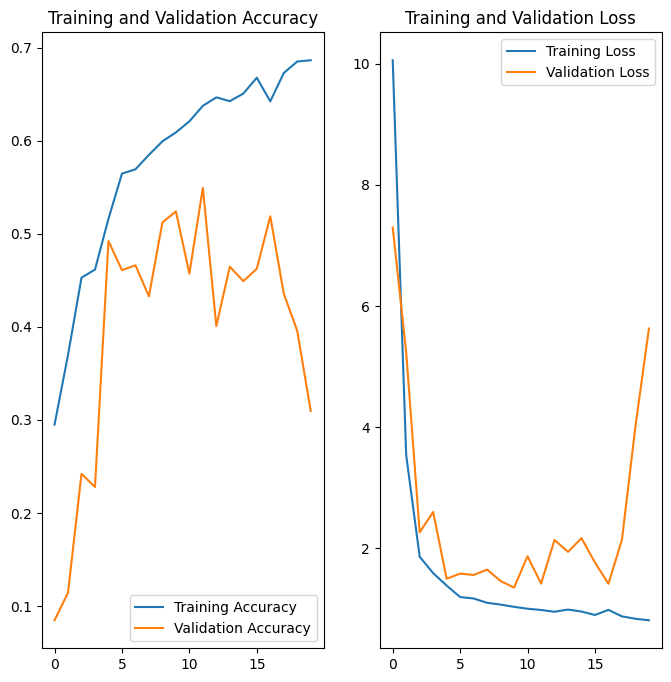

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:

## Model 6 - With Class Imbalance Augmentation + Dropouts + Batch Normilzation

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

### Listing Classwise Train and Test Percentage Distribution

In [32]:
# train data in each folders
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_test = os.listdir(data_dir_test)
dir_test.sort()

data_detail_pd = pd.DataFrame(columns=["Class","Images (Train)","Percentage (Train)","Images (Test)","Percentage (Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Class":dir_name,"Images (Train)":total_image_in_folder,"Percentage (Train)":round((total_image_in_folder/image_count_train)*100,2)}
   data_detail_pd = data_detail_pd.append(df,ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Class")

# test data in each folders
for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Images (Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Percentage (Test)"]  = round((total_image_in_folder/image_count_test)*100,2)

display(data_detail_pd.sort_values(by="Percentage (Train)",ascending=False))

,Images (Train),Percentage (Train),Images (Test),Percentage (Test)
Class,,,,
pigmented benign keratosis,462,20.63,16,13.56
melanoma,438,19.56,16,13.56
basal cell carcinoma,376,16.79,16,13.56
nevus,357,15.94,16,13.56
squamous cell carcinoma,181,8.08,16,13.56
vascular lesion,139,6.21,3,2.54
actinic keratosis,114,5.09,16,13.56
dermatofibroma,95,4.24,16,13.56
seborrheic keratosis,77,3.44,3,2.54


### Findings:
1. Highest Training Images: pigmented benign keratosis, 462 = 20.63%
2. Lowest Training Images: seborrheic keratosis, 77 = 3.44%
3. Highest Testing Images: All have same except vascular lesion, seborrheic keratosis, 16 = 0.71%
4. Lowest Testing Images: vascular lesion, seborrheic keratosis, 3 = 0.13%

## Rectifying Class Imbalance

### Installing Augmentor

In [33]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### Generating samples with Augmentor

In [35]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ECB895BABC0>: 100%|██████████| 500/500 [00:22<00:00, 22.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ECB8954FF10>: 100%|██████████| 500/500 [00:26<00:00, 18.68 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ECB8843E6E0>: 100%|██████████| 500/500 [00:19<00:00, 25.82 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7ECB8942C9D0>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ECB8977AB90>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ECB8C836B60>: 100%|██████████| 500/500 [00:20<00:00, 23.85 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ECB8C836680>: 100%|██████████| 500/500 [00:39<00:00, 12.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ECC0F7EB940>: 100%|██████████| 500/500 [00:19<00:00, 25.65 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7ECBB21C3FA0>: 100%|██████████| 500/500 [00:20<00:00, 24.25 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

NameError: name 'original_df' is not defined

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [58]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [59]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/Personal/upGrad/MS/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [60]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [62]:
# AutoTune & cache for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [63]:
model = models.Sequential([
    augmented_train_ds,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [64]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 89, 89, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 89, 89, 32)       

#### **Todo:**  Train your model

In [65]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 94s 133ms/step - loss: 7.7712 - accuracy: 0.3197 - val_loss: 7.4560 - val_accuracy: 0.1709
Epoch 2/50
281/281 [==============================] - 20s 72ms/step - loss: 2.0100 - accuracy: 0.4386 - val_loss: 1.7668 - val_accuracy: 0.3703
Epoch 3/50
281/281 [==============================] - 20s 72ms/step - loss: 1.3468 - accuracy: 0.5066 - val_loss: 1.8091 - val_accuracy: 0.3907
Epoch 4/50
281/281 [==============================] - 20s 72ms/step - loss: 1.3180 - accuracy: 0.5225 - val_loss: 1.4886 - val_accuracy: 0.4935
Epoch 5/50
281/281 [==============================] - 20s 72ms/step - loss: 1.1969 - accuracy: 0.5495 - val_loss: 1.9048 - val_accuracy: 0.4050
Epoch 6/50
281/281 [==============================] - 20s 72ms/step - loss: 1.1399 - accuracy: 0.5685 - val_loss: 1.6323 - val_accuracy: 0.4108
Epoch 7/50
281/281 [==============================] - 20s 71ms/step - loss: 1.0832 - accuracy: 0.5892 - val_loss: 1.2728 - val_accuracy

#### **Todo:**  Visualize the model results

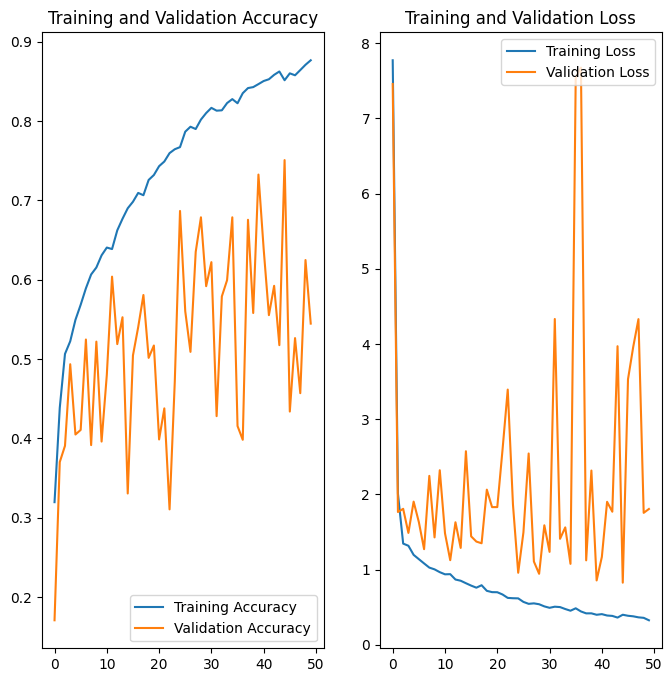

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [1]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = seed,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

NameError: name 'tf' is not defined

In [2]:
loss , accuracy = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

NameError: name 'model' is not defined

In [ ]:
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_test, class_name)
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Get the first image in each class
    img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(image_path, ': Score: ', score)
